# Removing Initialisation Bias: Welch's Method

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Run k independent simulations

In this example, each run tracks the value of interest over 10000 time periods.

In [2]:
# Here we assume we have done so and are reading in the output of these simulations
results = pd.read_csv('/Users/isaiah/Downloads/W9L1b_SimulationOutput.csv')

In [3]:
# Each row corresponds to 3 columns
# Time: the timestamp within each simulation run
# Run: the simulation run
# Value: the value of interest
print(results.head())
print(results.tail())

   Time  Run     Value
0     1    1  0.755518
1     2    1  1.161012
2     3    1  1.687567
3     4    1  2.652285
4     5    1  4.725153
         Time  Run      Value
249995   9996   25  22.272010
249996   9997   25  21.651979
249997   9998   25  19.293580
249998   9999   25  19.212369
249999  10000   25  17.942661


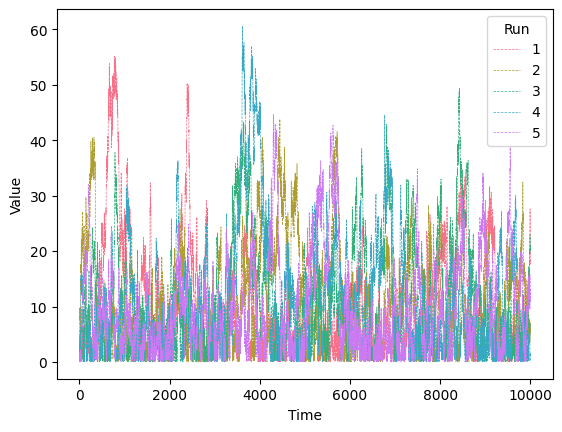

In [4]:
# Example plot of 5 runs (change the value of k to see different number of runs)
# Each run tracks the value of interest over 10000 time periods
k=5
sns.lineplot(x='Time',y='Value',hue='Run',data=results[results['Run']<=k],palette=sns.color_palette('husl',k),linestyle='--',linewidth=0.5)
plt.show()

## Step 2: Average matching observations
Average across runs for each time period.

In [5]:
# Average the value at each time period, over all k runs.
ave_results = results.groupby('Time',as_index=False)['Value'].mean()

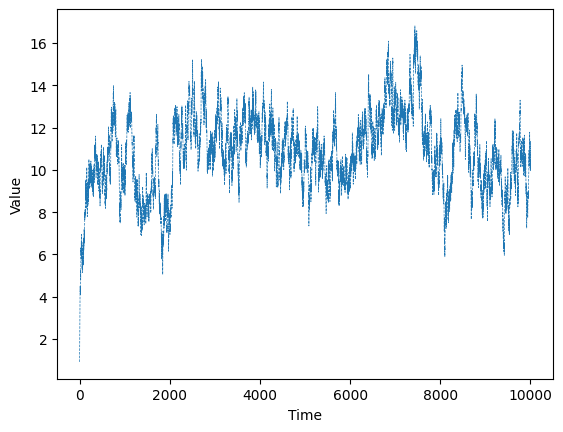

In [6]:
sns.lineplot(x='Time',y='Value',data=ave_results,linestyle='--',linewidth=0.5)
plt.show()

## Step 3: Compute moving averages
Compute the moving average over the last t time periods to be able to observe general trends.

In [7]:
ave_results['moving_avg'] = ave_results['Value'].rolling(100).mean()

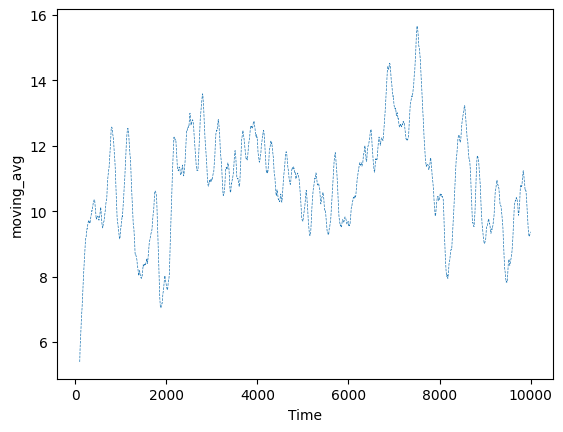

In [8]:
sns.lineplot(x='Time',y='moving_avg',data=ave_results,linestyle='--',linewidth=0.5)
plt.show()

## Step 4: Plot moving averages for different window sizes
Different window sizes show trends at different timescales.

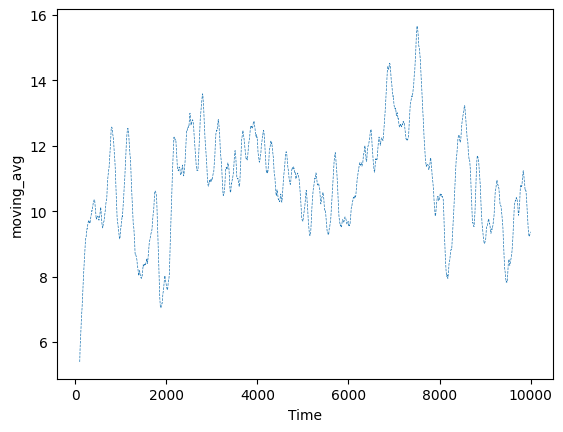

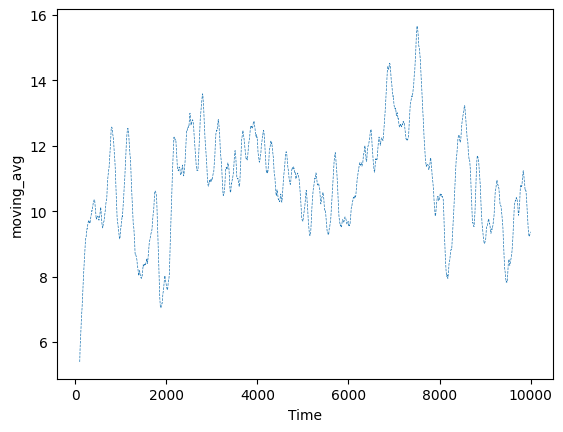

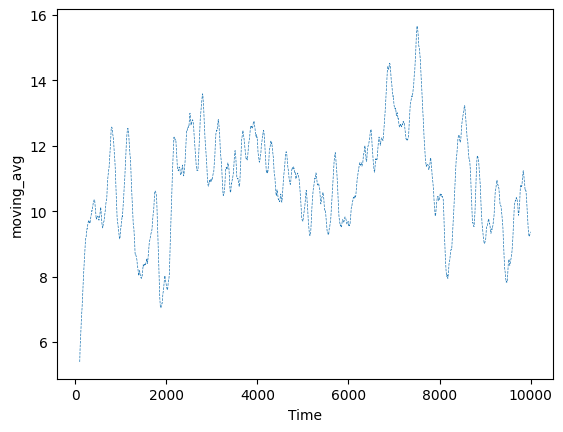

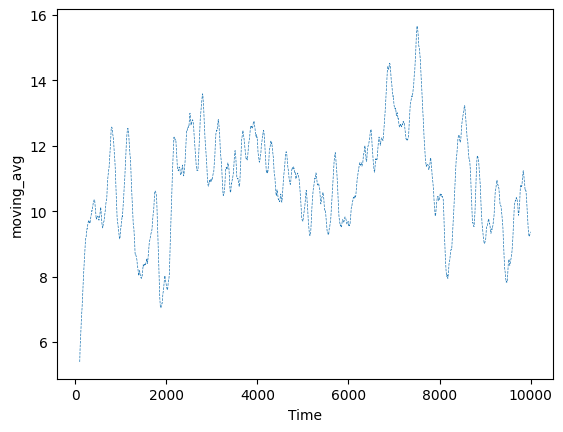

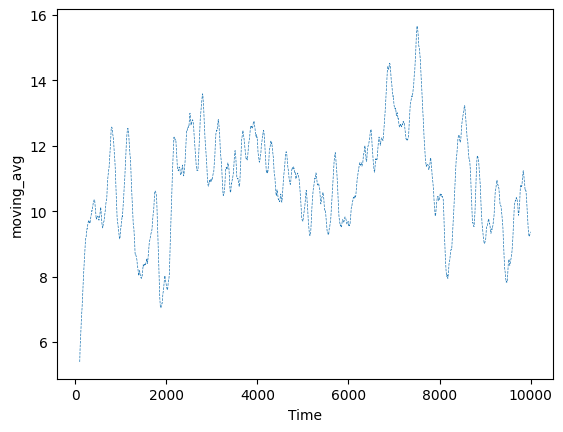

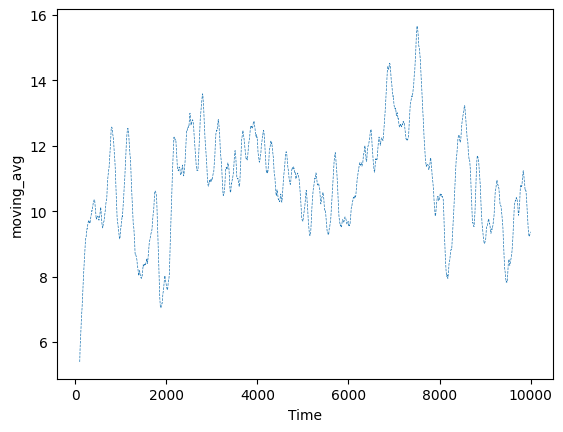

In [9]:
for mavg in [50,100,150,200,250,500]:
    ave_results['moving_avg'] = ave_results['Value'].rolling(100).mean()
    sns.lineplot(x='Time',y='moving_avg',data=ave_results,linestyle='--',linewidth=0.5)
    plt.show()

## Step 5: Determine burn-in period by inspection

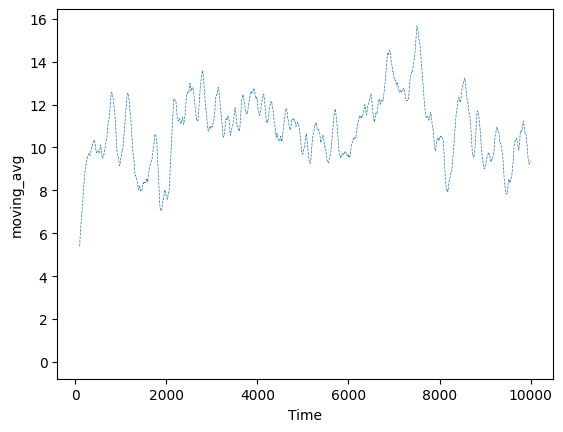

In [10]:
mavg = 50
ave_results['moving_avg'] = ave_results['Value'].rolling(100).mean()
sns.lineplot(x='Time',y='moving_avg',data=ave_results,linestyle='--',linewidth=0.5)
plt.plot([2300, 2300], [0, max(ave_results['moving_avg'][mavg-1:])])
plt.show()

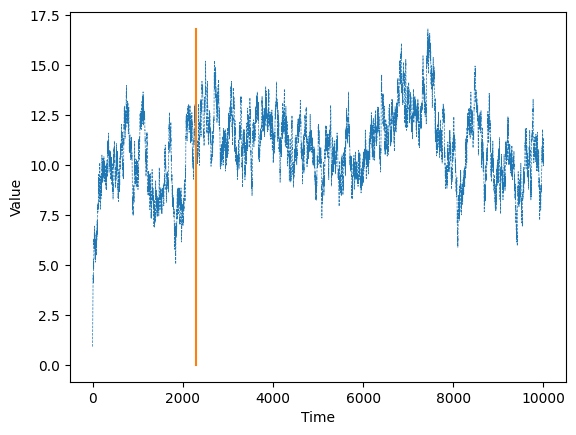

In [11]:
sns.lineplot(x='Time',y='Value',data=ave_results,linestyle='--',linewidth=0.5)
plt.plot([2300, 2300], [0, max(ave_results['Value'])])
plt.show()